In [130]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [125]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


iris = pd.read_csv(url, header=None, names=columns)

print(iris.head())
print(iris.info())
print(iris.describe())
print(iris['species'].value_counts())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean

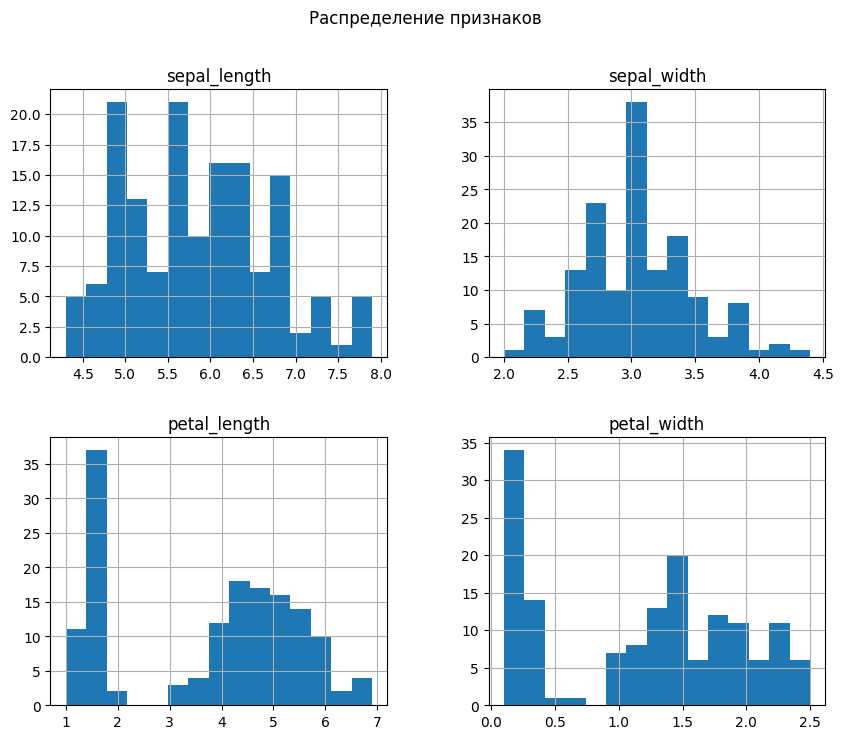

In [126]:
iris.hist(figsize=(10,8), bins=15)
plt.suptitle('Распределение признаков')
plt.show()

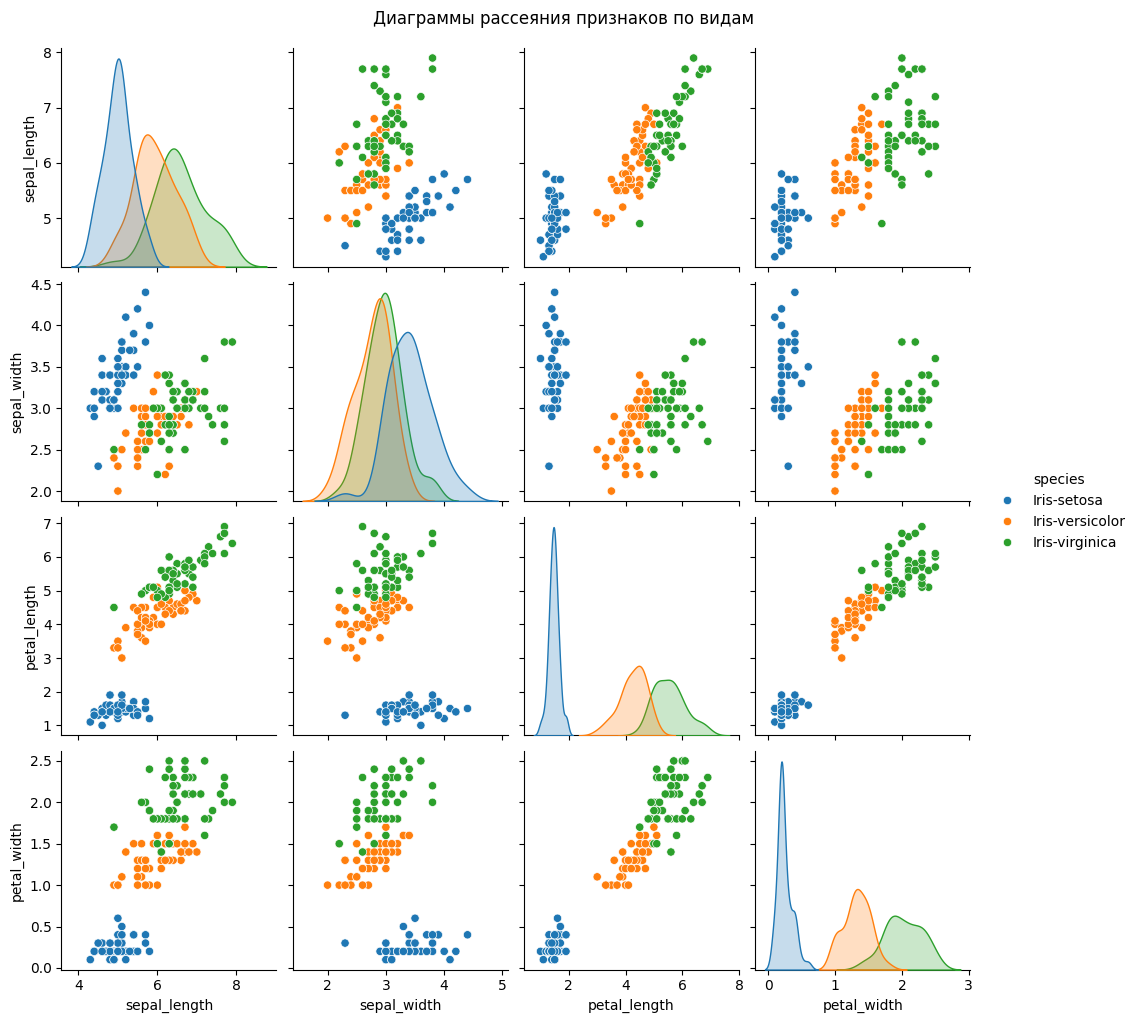

In [127]:
sns.pairplot(iris, hue='species', diag_kind='kde')
plt.suptitle('Диаграммы рассеяния признаков по видам', y=1.02)
plt.show()

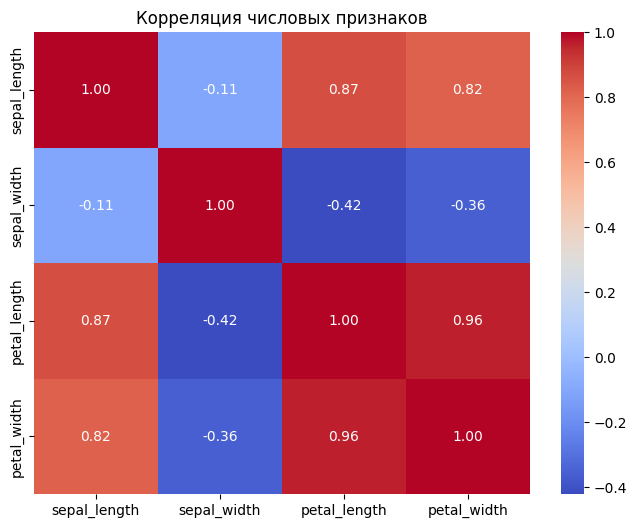

In [128]:
plt.figure(figsize=(8,6))
sns.heatmap(iris.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция числовых признаков')
plt.show()


In [129]:
le = LabelEncoder()
iris['species'] = le.fit_transform(iris['species'])

X = iris.drop('species', axis=1)
y = iris['species']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [131]:
n_trees = 1000
depth = 3
shrinkage = 0.25
bag_fraction = 1.0
loss_functions = ['squared_error', 'absolute_error']

models = {}
errors = {}

for loss in loss_functions:
    model = GradientBoostingRegressor(
        n_estimators=n_trees,
        max_depth=depth,
        learning_rate=shrinkage,
        subsample=bag_fraction,
        loss=loss,
        random_state=42
    )
    model.fit(X_train, y_train)
    models[loss] = model

    y_pred = model.predict(X_test)
    if loss == 'squared_error':
        error = mean_squared_error(y_test, y_pred)
    else:
        error = mean_absolute_error(y_test, y_pred)

    errors[loss] = error

print("Ошибки на тестовой выборке:")
for loss, err in errors.items():
    print(f"{loss}: {err:.4f}")

Ошибки на тестовой выборке:
squared_error: 0.0036
absolute_error: 0.3667


In [132]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

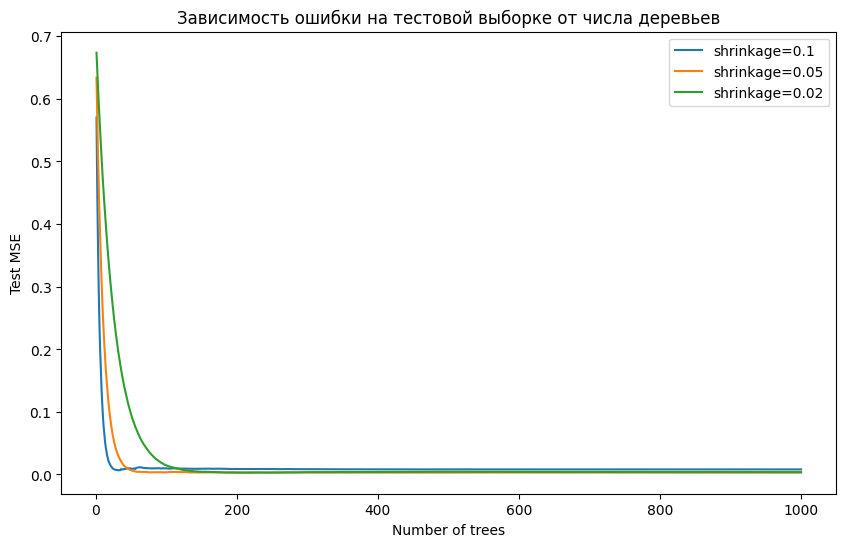

In [133]:
shrinkage_values = [0.1, 0.05, 0.02]
bag_fraction = 0.65
n_trees = 1000

plt.figure(figsize=(10,6))

for lr in shrinkage_values:
    model = GradientBoostingRegressor(
        n_estimators=n_trees,
        max_depth=3,
        learning_rate=lr,
        subsample=bag_fraction,
        loss='squared_error',
        random_state=42
    )
    model.fit(X_train, y_train)


    test_errors = [mean_squared_error(y_test, y_pred) for y_pred in model.staged_predict(X_test)]

    plt.plot(range(1, n_trees+1), test_errors, label=f'shrinkage={lr}')

plt.xlabel('Number of trees')
plt.ylabel('Test MSE')
plt.title('Зависимость ошибки на тестовой выборке от числа деревьев')
plt.legend()
plt.show()

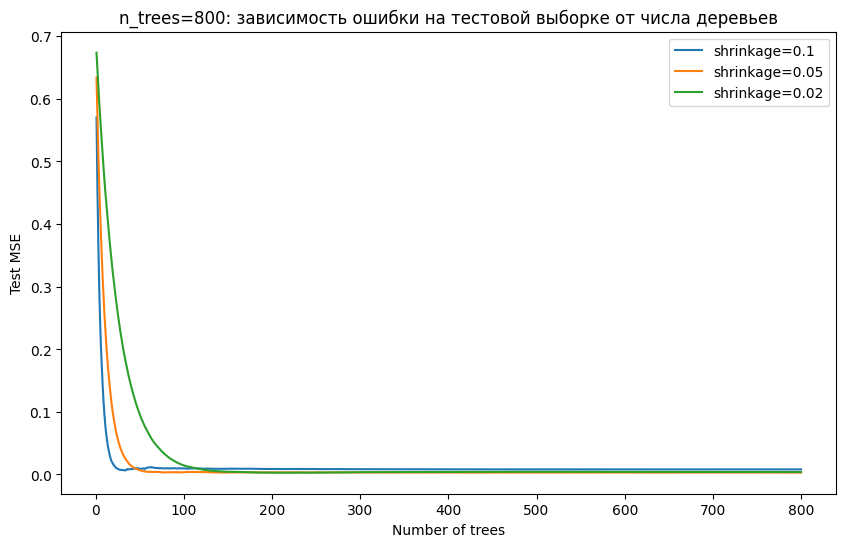

In [134]:
n_trees = 800
shrinkage_values = [0.1, 0.05, 0.02]
bag_fraction = 0.65

plt.figure(figsize=(10,6))

for lr in shrinkage_values:
    model = GradientBoostingRegressor(
        n_estimators=n_trees,
        max_depth=3,
        learning_rate=lr,
        subsample=bag_fraction,
        loss='squared_error',
        random_state=42
    )
    model.fit(X_train, y_train)


    test_errors = [mean_squared_error(y_test, y_pred) for y_pred in model.staged_predict(X_test)]

    plt.plot(range(1, n_trees+1), test_errors, label=f'shrinkage={lr}')

plt.xlabel('Number of trees')
plt.ylabel('Test MSE')
plt.title('n_trees=800: зависимость ошибки на тестовой выборке от числа деревьев')
plt.legend()
plt.show()


Общий вывод

Лучшая функция потерь: squared_error (Gaussian).

Оптимальные параметры для Iris:

n_trees ≈ 800–1000

max_depth = 3

learning_rate = 0.05–0.1

subsample ≈ 0.65 для регуляризации

Меньший learning_rate и умеренное количество деревьев дают лучшее обобщение, а функция потерь squared_error обеспечивает наименьшую ошибку.

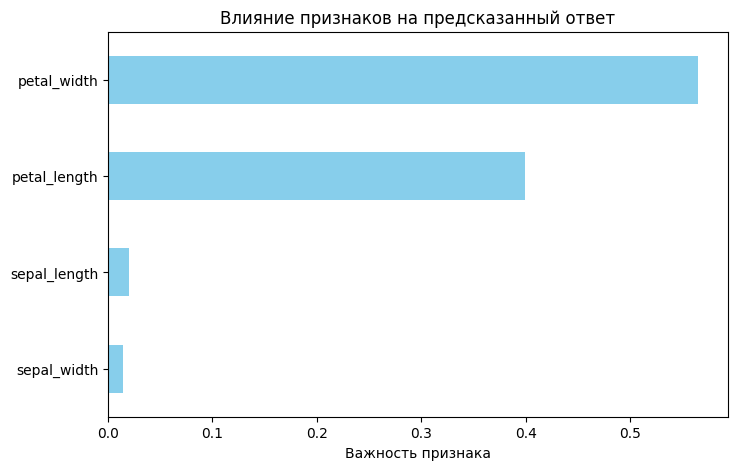

In [135]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import pandas as pd


best_model = GradientBoostingRegressor(
    n_estimators=800,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.65,
    loss='squared_error',
    random_state=42
)


best_model.fit(X_train, y_train)


importances = pd.Series(best_model.feature_importances_, index=X.columns)


importances = importances.sort_values(ascending=True)

plt.figure(figsize=(8,5))
importances.plot(kind='barh', color='skyblue')
plt.title('Влияние признаков на предсказанный ответ')
plt.xlabel('Важность признака')
plt.show()
